# Experiments on KuHar Resampled to 20Hz

This notebook will perform basic experiments on the balanced KuHar dataset with the following steps:
1. Quick load train, test and validation CSV subsets from the balanced KuHar dataset using `PandasDatasetsIO` helper
2. Subclassing the `Dataset` interface using `PandasMultiModalDataset`
3. Apply the fourier transform on the dataset
4. Apply t-SNE in both datasets together in time and frequency domains

The experiments will evaluate the distrbution between KuHar and MotionSense on the balanced datasets in both time and frequency domains.

## Common imports and definitions

In [1]:
from pathlib import Path  # For defining dataset Paths
import sys                # For include librep package

# This must be done if librep is not installed via pip,
# as this directory (examples) is appart from librep package root
sys.path.append("..")

# Third party imports
import pandas as pd
import numpy as np

# Librep imports
from librep.utils.dataset import PandasDatasetsIO          # For quick load train, test and validation CSVs
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

## Loading data
Change the path to use in other datasets

In [2]:
# Path for KuHar resampled to 30Hz view with the same activities (and labels numbers)
# It is assumed that the directory will contain (train.csv, test.csv and validation.csv)
dataset_path_kuhar = Path("../data/views/KuHar/resampled_view_20Hz")
dataset_path_motionsense = Path("../data/views/MotionSense/resampled_view_20Hz")

Once paths is defined, we can load the CSV as pandas dataframes

In [3]:
# Kuhar/Motionsense dataframes
train_kuhar, validation_kuhar, test_kuhar = PandasDatasetsIO(dataset_path_kuhar).load()
train_motionsense, validation_motionsense, test_motionsense = PandasDatasetsIO(dataset_path_motionsense).load()

In [4]:
all_data_kuhar = pd.concat([train_kuhar, validation_kuhar, test_kuhar])
all_data_motionsense = pd.concat([train_motionsense, validation_motionsense, test_motionsense])

X = [0 for i in range(len(all_data_kuhar))]
all_data_kuhar['Dataset'] = X

X = [1 for i in range(len(all_data_motionsense))]
all_data_motionsense['Dataset'] = X

## Removing activities that don't exist in MotionSense and changing their codes.

In [5]:
activity_kuhar = {
        0: "Stand",
        1: "Sit",
        11: "Walk",
        14: "Run",
        15: "Stair-up",
        16: "Stair-down",
}

activity_motionsense = {
        3: "std",
        2: "sit",
        4: "wlk",
        5: "jog",
        1: "ups",
        0: "dws"
}

kh = list(activity_kuhar.keys())
ms = list(activity_motionsense.keys())
l = [k for k in range(6)]
kh

[0, 1, 11, 14, 15, 16]

In [6]:
all_data_kuhar = all_data_kuhar[all_data_kuhar['activity code'].isin(kh)]

In [7]:
all_data_kuhar['activity code'].unique()

array([ 0,  1, 11, 14, 15, 16])

In [8]:
for k in range(6):
    all_data_kuhar['activity code'] = all_data_kuhar['activity code'].replace(kh[k], k+6)

In [9]:
all_data_kuhar['activity code'].unique()

array([ 6,  7,  8,  9, 10, 11])

## Creating a Librep dataset from pandas dataframes

Change the features to use in other datasets

In [10]:
features_motionsense = list(all_data_motionsense.columns[1:-6]) + ['Dataset', 'activity code']
# all_data_motionsense.head()

In [11]:
features_kuhar = list(all_data_kuhar.columns[1:-10]) + ['Dataset', 'activity code']
# all_data_kuhar

In [12]:
X1 = np.array(all_data_kuhar[features_kuhar])
X2 = np.array(all_data_motionsense[features_motionsense])

In [13]:
all_data = pd.DataFrame(np.concatenate((X1, X2)), columns=list(features_kuhar))
all_data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-52,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59,Dataset,activity code
0,0.001911,-0.014536,0.005845,0.003675,-0.014972,0.025607,0.000478,-0.031141,-0.014827,0.007698,...,0.001825,0.001371,0.001833,0.004464,0.001801,0.003457,0.002329,0.004456,0.0,6.0
1,0.004114,-0.003186,0.000759,0.012450,-0.032074,0.007270,-0.000470,0.006980,0.021400,-0.004322,...,0.000980,0.002541,0.002686,0.001974,0.000284,-0.000994,-0.001829,0.002979,0.0,6.0
2,-0.011282,-0.002432,-0.003199,0.008152,-0.021763,0.000309,-0.004968,-0.009551,0.001497,0.023026,...,0.003661,0.002066,0.004430,0.002010,0.003426,0.003568,0.004382,0.003343,0.0,6.0
3,-0.009241,-0.004666,0.021606,-0.007200,0.003091,0.001630,0.005057,-0.008149,0.013167,0.001474,...,-0.001067,0.001618,-0.000879,-0.000072,-0.000778,-0.000822,-0.001413,-0.002053,0.0,6.0
4,-0.013083,-0.005612,0.001645,0.006823,-0.004159,0.000415,0.008178,0.002637,-0.000827,0.000606,...,0.001202,0.001578,-0.000974,0.006024,0.003917,0.000509,0.004098,0.002603,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,-0.053125,-0.417727,0.362315,0.014858,0.479426,0.494016,-0.284822,-0.084017,0.284447,-0.488063,...,0.441880,0.174916,-0.226131,-0.378486,-0.337297,0.560125,2.156701,-0.501302,1.0,5.0
6308,-0.459128,-1.513311,-0.091196,0.414702,-2.691333,-0.519000,1.879917,1.604653,3.055666,-0.343313,...,2.929467,-0.275450,8.728854,2.112099,2.112168,-3.248353,-1.771040,-8.619563,1.0,5.0
6309,-0.099885,-0.062146,0.003534,-0.095406,0.148759,-0.419121,-0.010502,0.108253,0.321862,0.036395,...,-0.104440,0.372527,0.798453,-0.187261,-0.351512,-0.024182,-0.266553,-0.811363,1.0,5.0
6310,0.280130,0.393070,-0.229514,-0.252522,-0.445879,-0.496591,0.516785,1.022505,-0.113360,-0.421121,...,0.376575,0.495909,0.136660,0.423858,-0.294283,0.201025,-0.374531,0.137912,1.0,5.0


In [14]:
features = features_kuhar[:-2]
# features

## t-SNE Transform

In [15]:
from sklearn.manifold import TSNE

tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data[features])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data['Dataset']

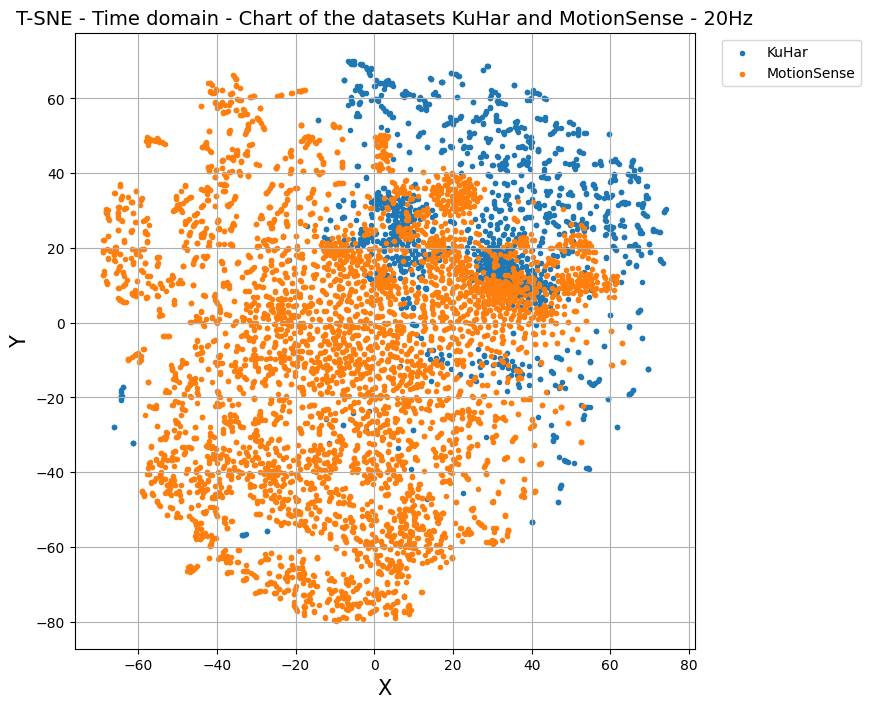

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title("T-SNE - Time domain - Chart of the datasets KuHar and MotionSense - 20Hz", fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()

Lets show the datasets in the frequency domain and compare with the result above

## Creating a Librep dataset from pandas dataframes

Change the features to use in other datasets

In [18]:
# Kuhar and MotionSense features to select
features = [
    "accel-x",
    "accel-y",
    "accel-z",
    "gyro-x",
    "gyro-y",
    "gyro-z"
]

# Creating the datasets

# Train
all_data_multimodal = PandasMultiModalDataset(
    all_data,
    feature_prefixes=features,
    label_columns="Dataset",
    as_array=True
)

## Fourier Transform

In [19]:
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [20]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(transforms=[fft_transform], new_window_name_prefix="fft.")

### Use FFT in the data

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


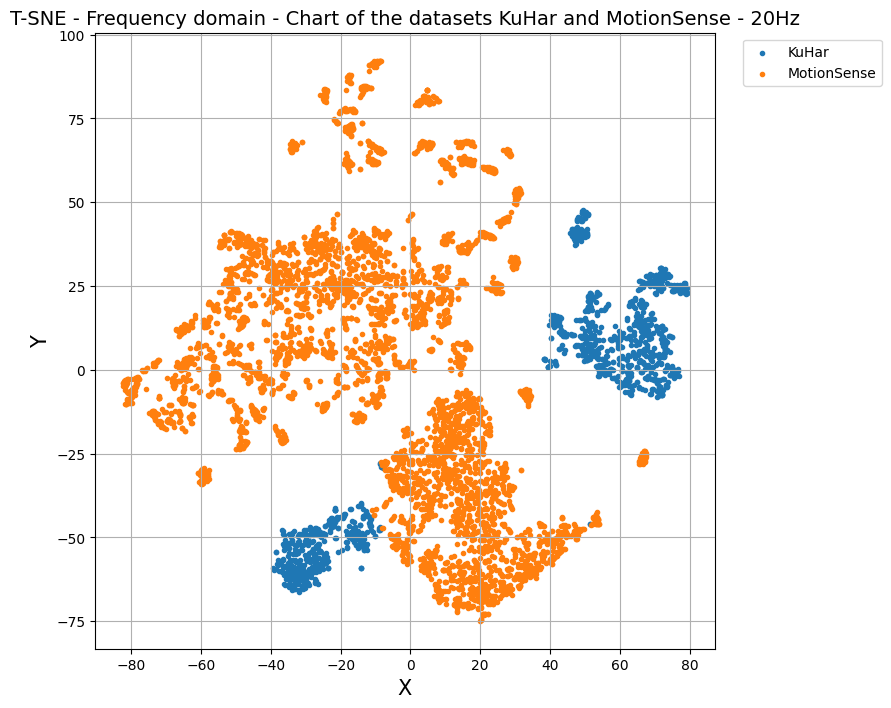

In [21]:
all_data_multimodal_fft = transformer(all_data_multimodal)

tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data_multimodal_fft.X)

tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data_multimodal_fft.y

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title("T-SNE - Frequency domain - Chart of the datasets KuHar and MotionSense - 20Hz", fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()

## Use t-SNE to show separete classes

In [22]:
def transformMultimodal(X):
    # Kuhar and MotionSense features to select
    features = [
        "accel-x",
        "accel-y",
        "accel-z",
        "gyro-x",
        "gyro-y",
        "gyro-z"
    ]

    # Creating the datasets

    # Train
    data_multimodal = PandasMultiModalDataset(
        X,
        feature_prefixes=features,
        label_columns="activity code",
        as_array=True
    )
    return data_multimodal

def tsne(data, num_classes, classes, transforms, title):

    X = data[data['activity code'].isin(num_classes)]
    X_new = transformMultimodal(X)

    transformer = TransformMultiModalDataset(transforms=transforms, new_window_name_prefix="transform.")
    data_multimodal_fft = transformer(X_new)
    
    tsne_model = TSNE(random_state=42)
    tsne_df = tsne_model.fit_transform(data_multimodal_fft.X)

    tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
    tsne_df
    tsne_df["class"] = data_multimodal_fft.y

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('Y', fontsize=15)
    ax.set_title(title, fontsize=14)

    labels = []
    for c, ds in tsne_df.groupby(["class"]):
        ax.scatter(ds["X"], ds["Y"], marker='.')
        if c  in num_classes:
            idx = num_classes.index(c)
            labels.append(classes[num_classes[idx]])
        # else:
        #     labels.append(classes[num_classes[1]])

    ax.legend(labels, bbox_to_anchor = (1.28, 1.))
    ax.grid()
    plt.show()
fft_transform = FFT(centered = True)

In [23]:
pares = [[0, 11], [1, 10], [2, 7], [3, 6], [4, 8], [5, 9]]

labels_ms = ['Downstairs', 'Upstairs', 'Sitting', 'Standing', 'Walking', 'Jogging']
labels_kh = ["Stand", "Sit", "Walk", "Run", "Stair-up", "Stair-down"]

classes = []
for c in labels_ms:
    classes.append(c + ' - MS')
for c in labels_kh:
    classes.append(c + ' - KH')
classes

['Downstairs - MS',
 'Upstairs - MS',
 'Sitting - MS',
 'Standing - MS',
 'Walking - MS',
 'Jogging - MS',
 'Stand - KH',
 'Sit - KH',
 'Walk - KH',
 'Run - KH',
 'Stair-up - KH',
 'Stair-down - KH']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


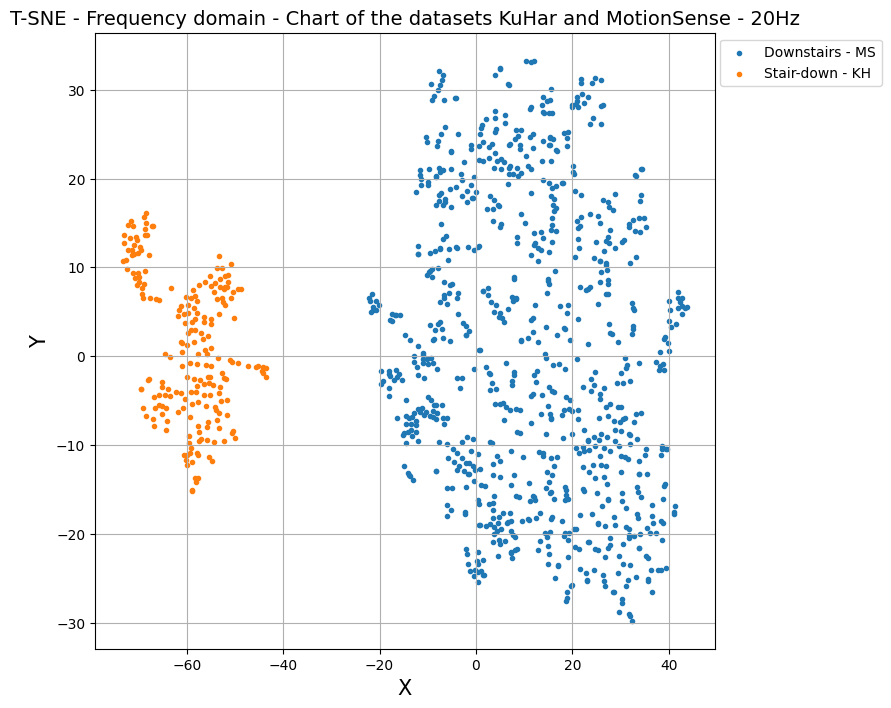

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


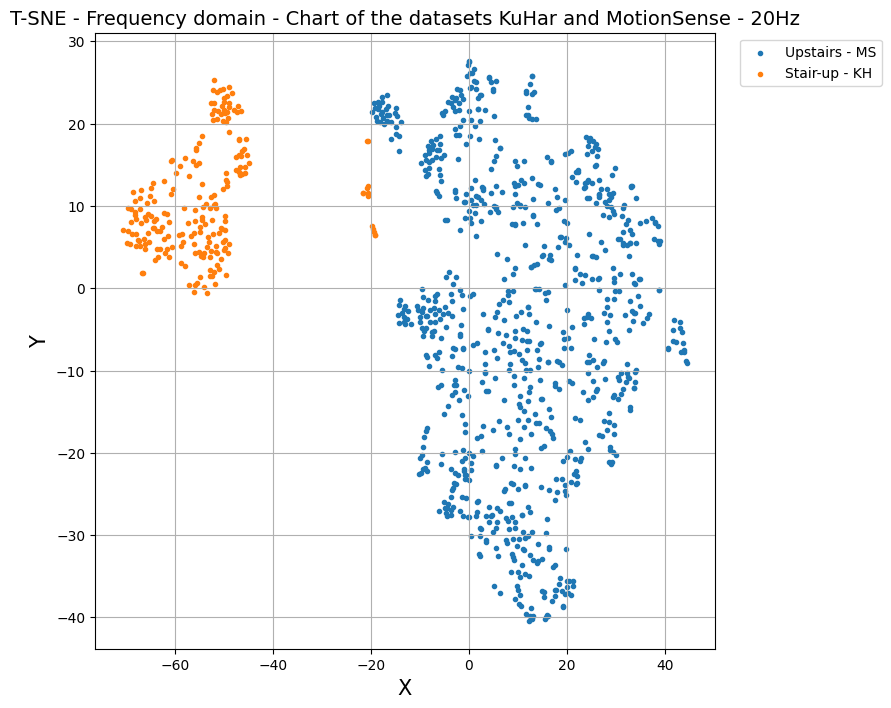

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


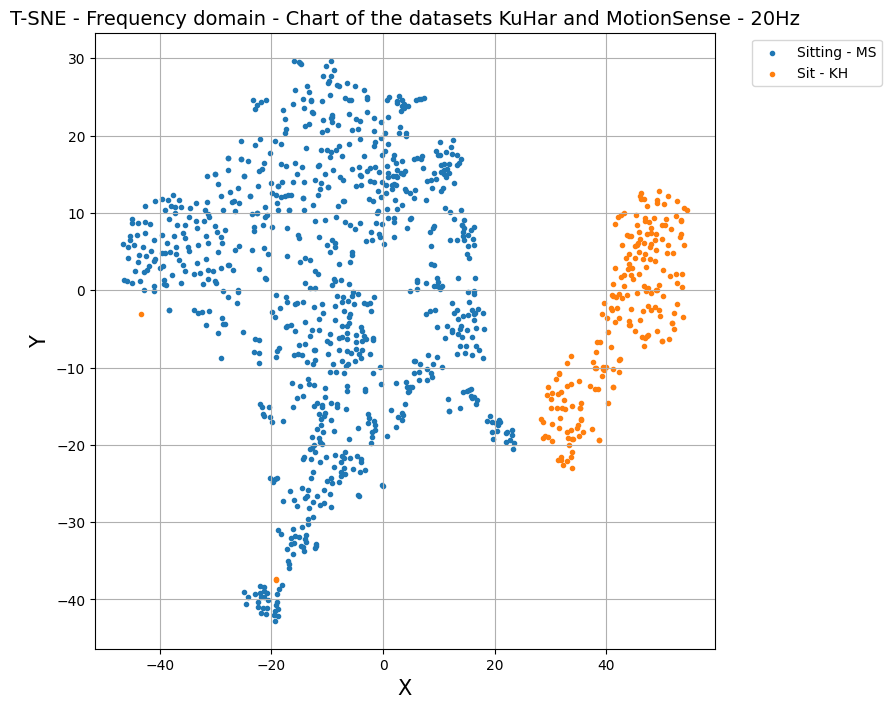

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


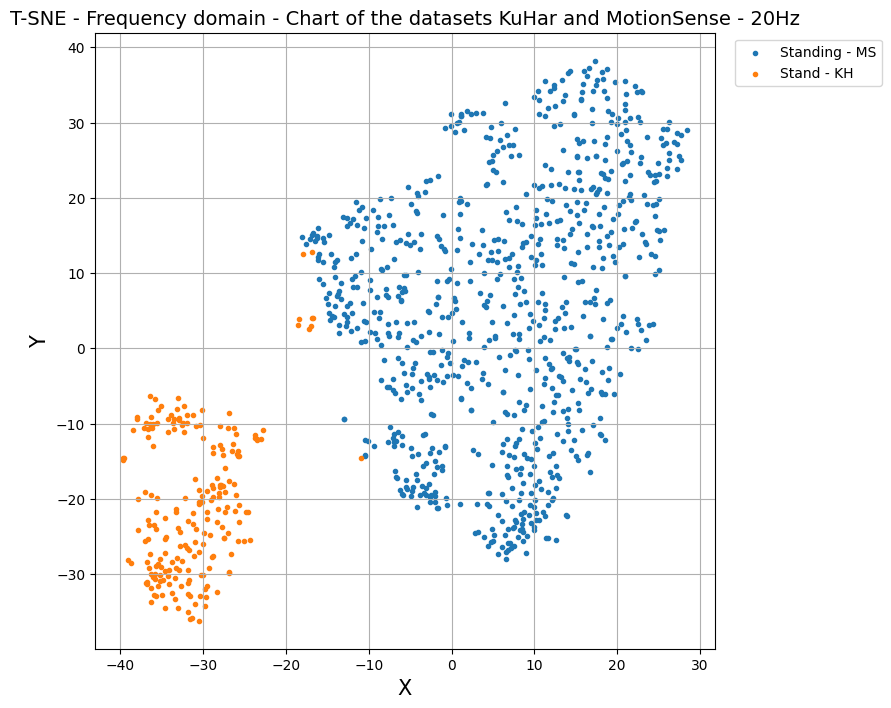

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


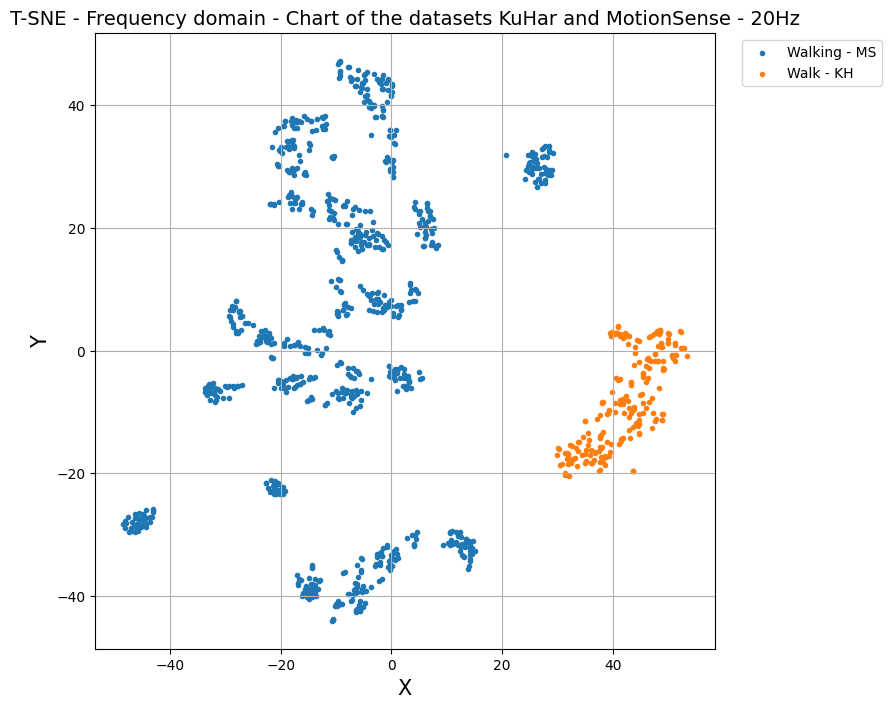

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


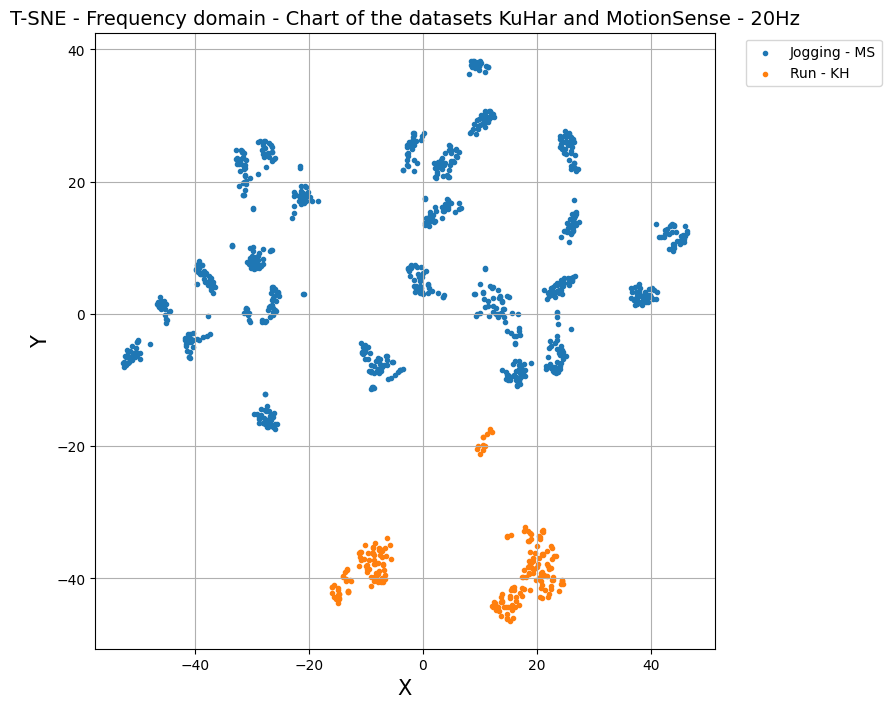

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


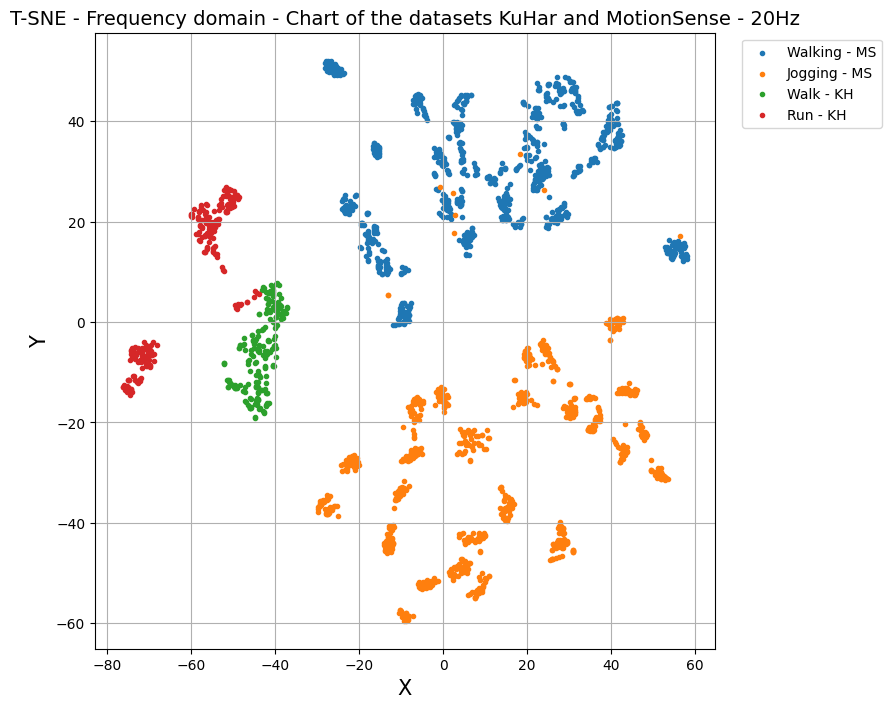

In [24]:
transforms = [fft_transform]
title = "T-SNE - Frequency domain - Chart of the datasets KuHar and MotionSense - 20Hz"
for i in range(6):
    tsne(all_data, pares[i], classes, transforms, title)
tsne(all_data, [*pares[4], *pares[5]], classes, transforms, title)

## What happens if we use statistic features?

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


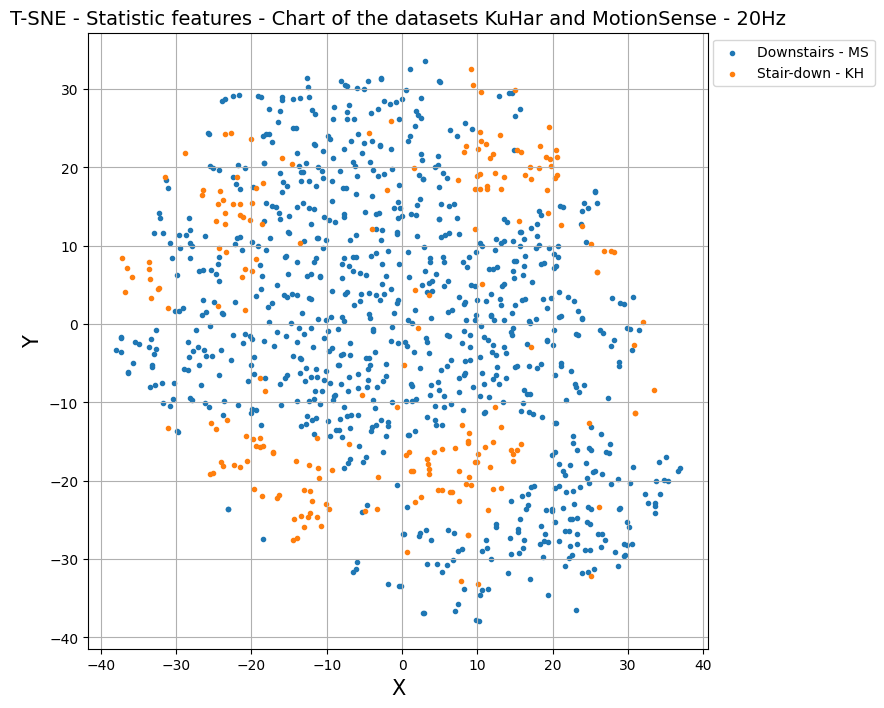

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


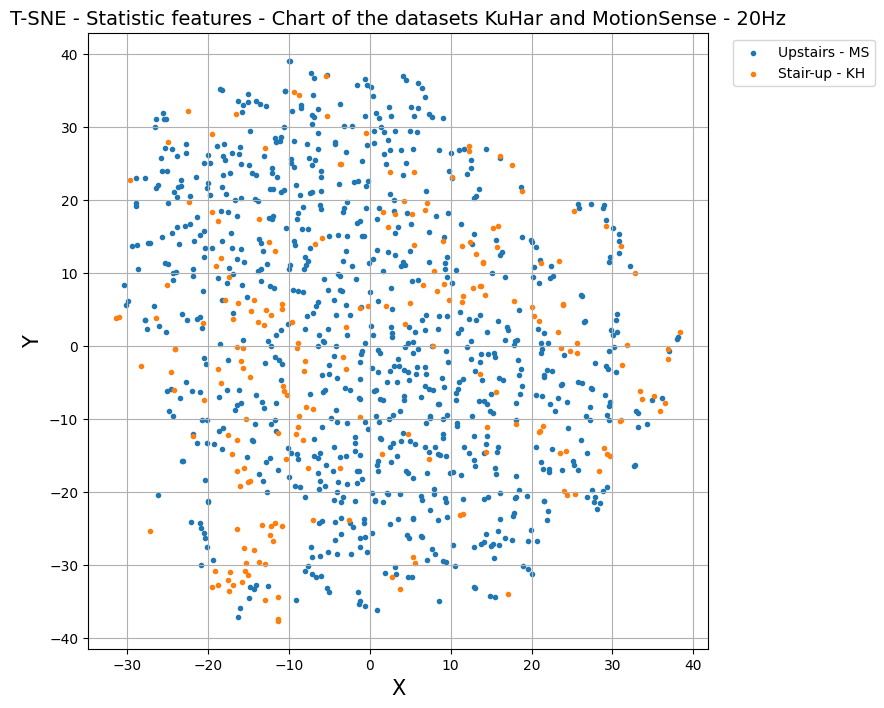

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


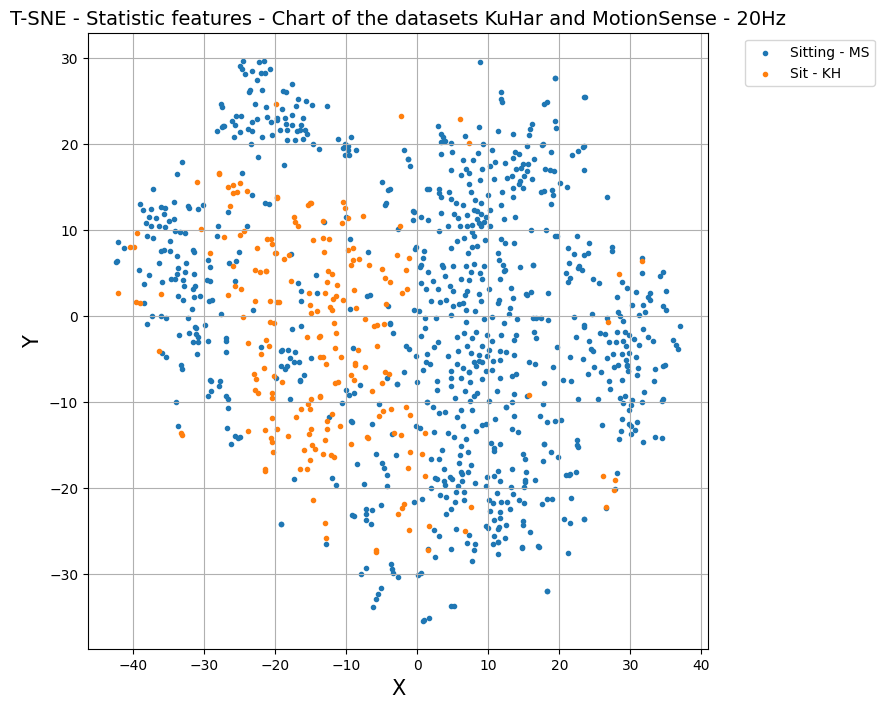

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


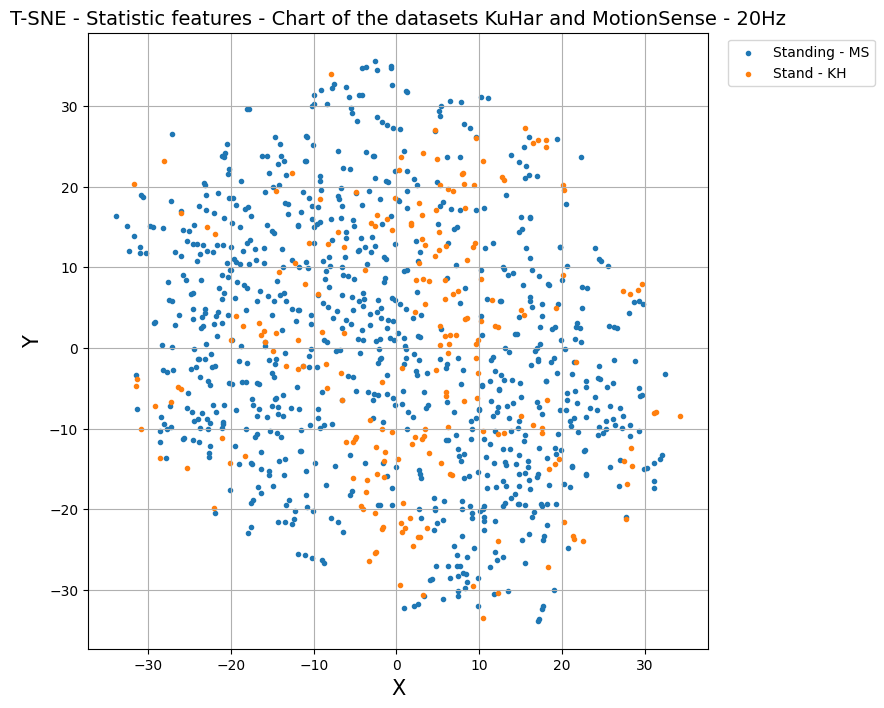

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


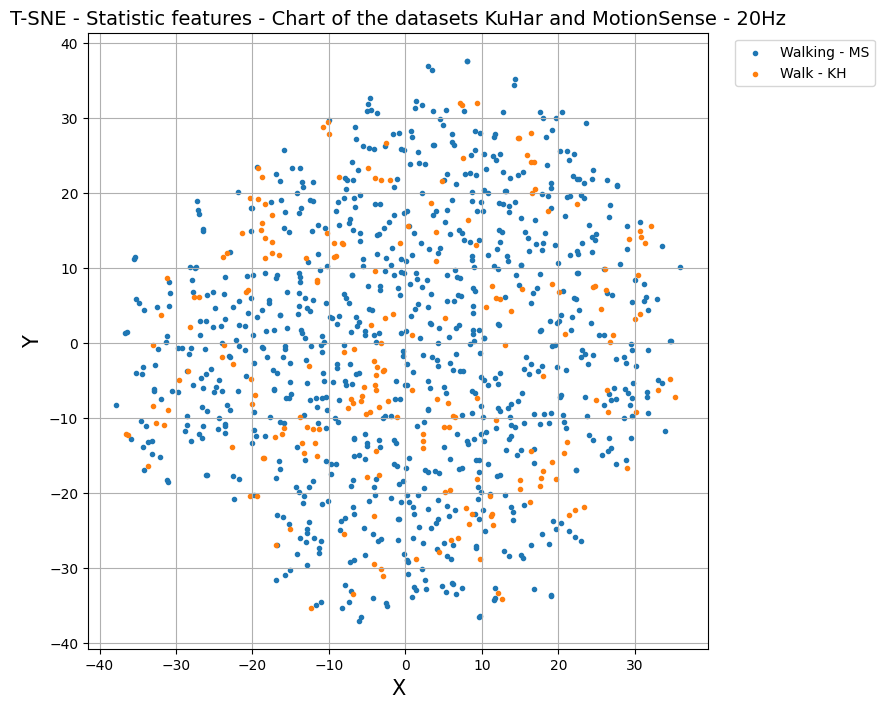

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


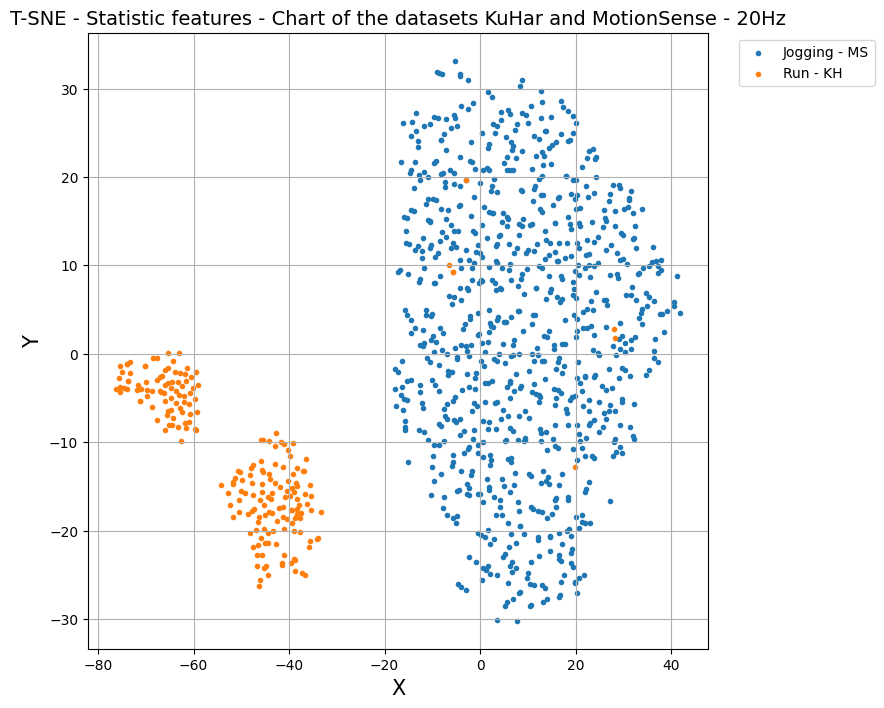

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


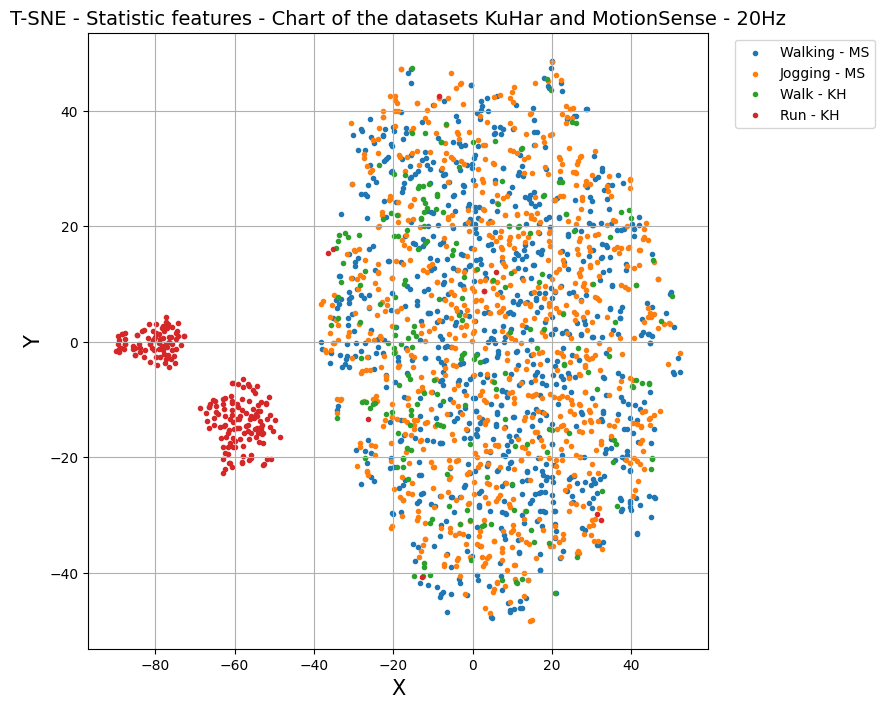

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


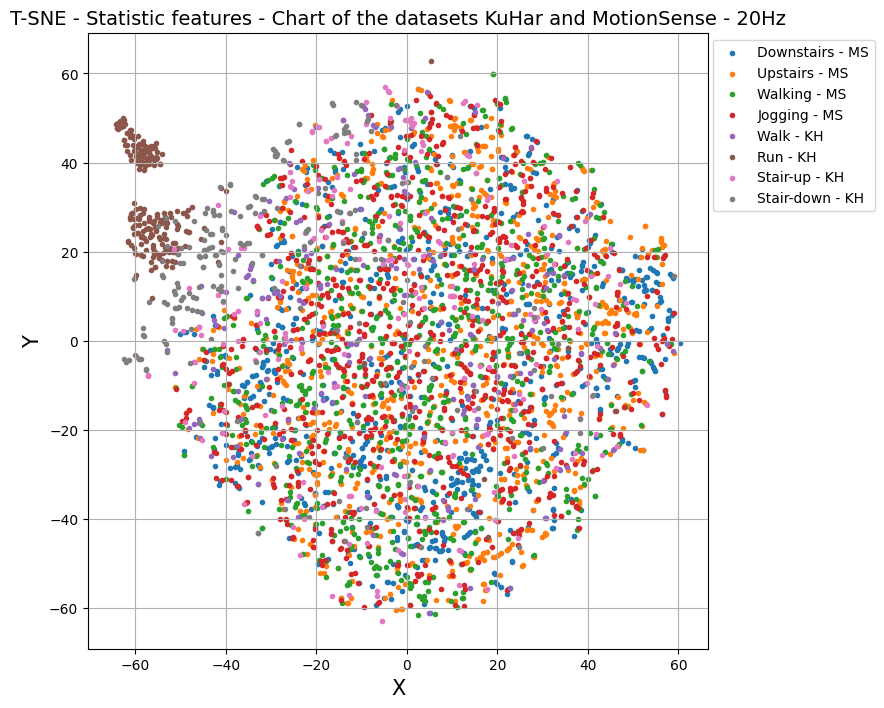

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


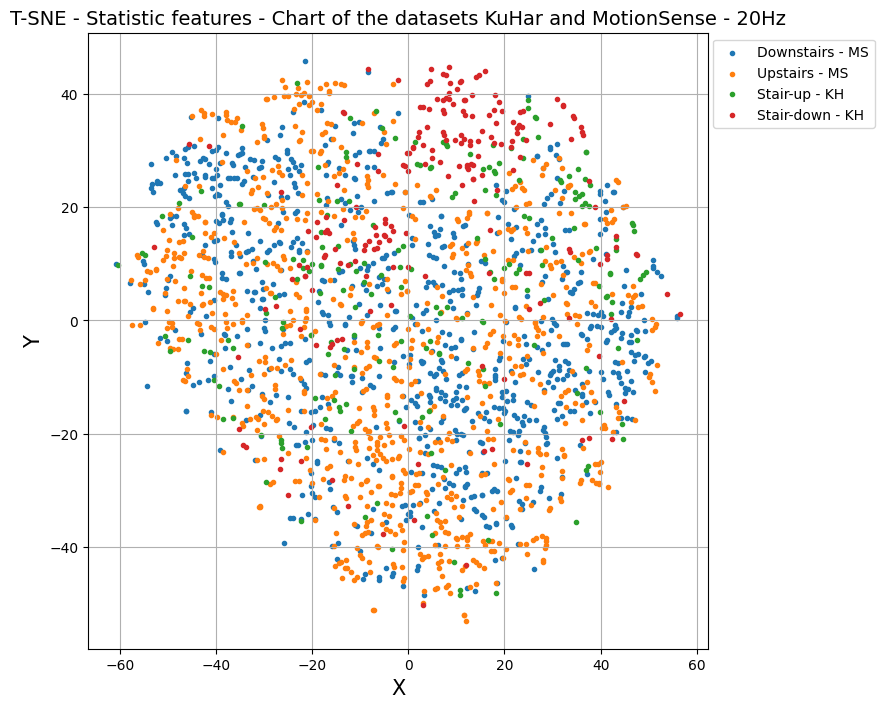

In [26]:
from librep.transforms.stats import StatsTransform

stats_transform = StatsTransform()
transforms = [stats_transform]
title = "T-SNE - Statistic features - Chart of the datasets KuHar and MotionSense - 20Hz"

for i in range(6):
    tsne(all_data, pares[i], classes, transforms, title)

tsne(all_data, [*pares[4], *pares[5]], classes, transforms, title)
tsne(all_data, [*pares[0], *pares[1], *pares[4], *pares[5]], classes, transforms, title)
tsne(all_data, [*pares[0], *pares[1]], classes, transforms, title)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


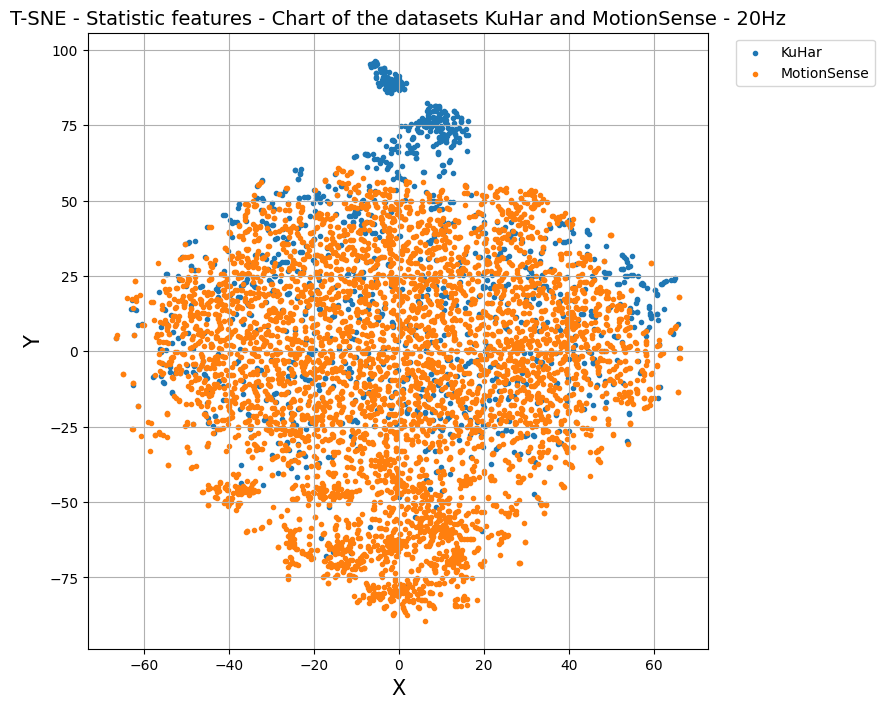

In [27]:
transformer = TransformMultiModalDataset(transforms=[stats_transform], new_window_name_prefix="st.")
all_data_multimodal_st = transformer(all_data_multimodal)

tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data_multimodal_st.X)

tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data_multimodal_st.y

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title(title, fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


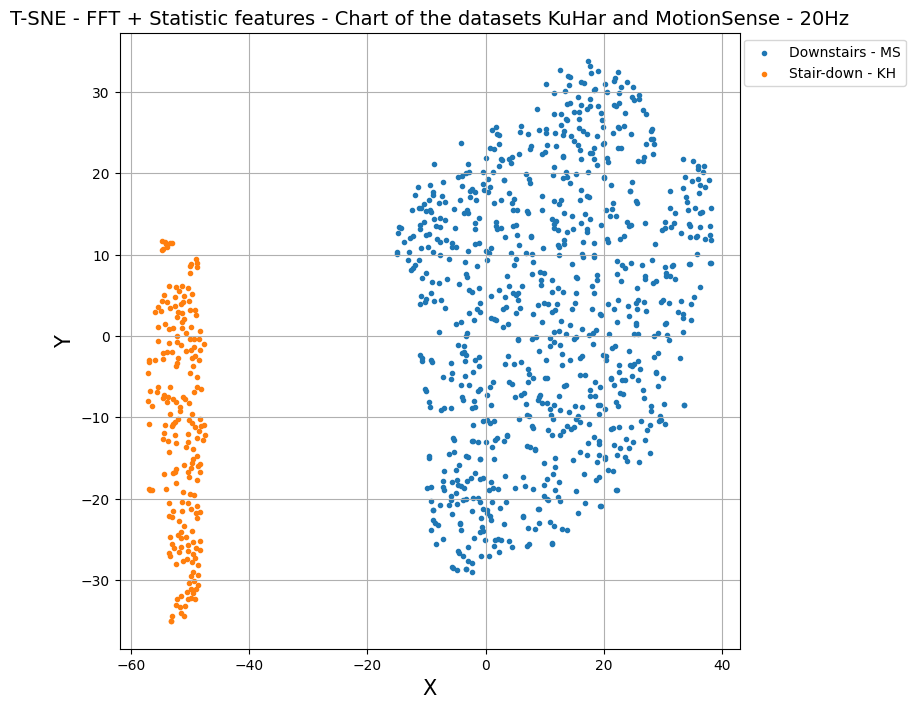

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


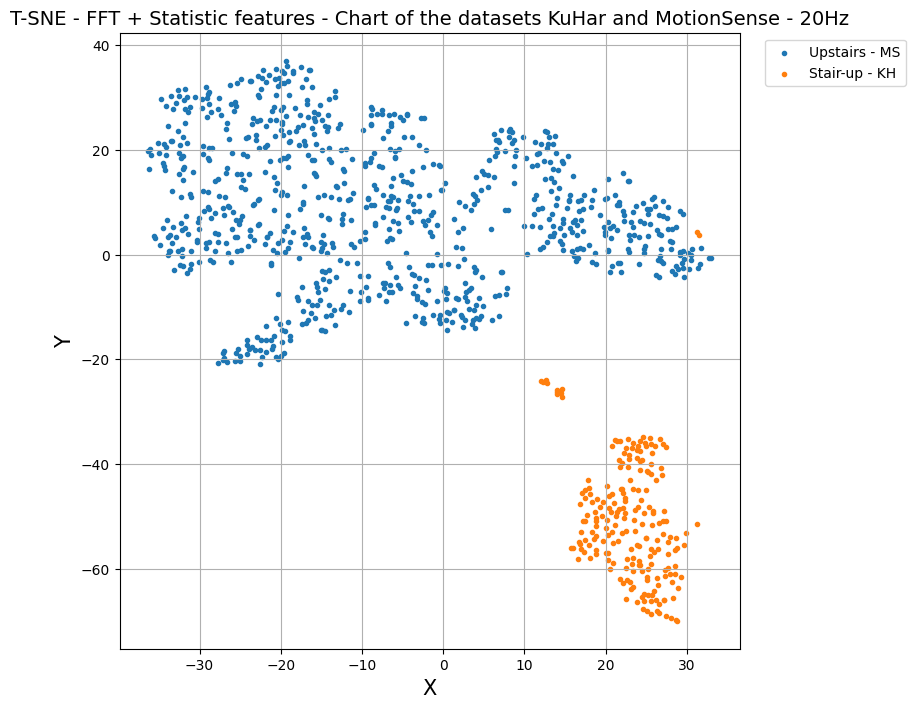

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


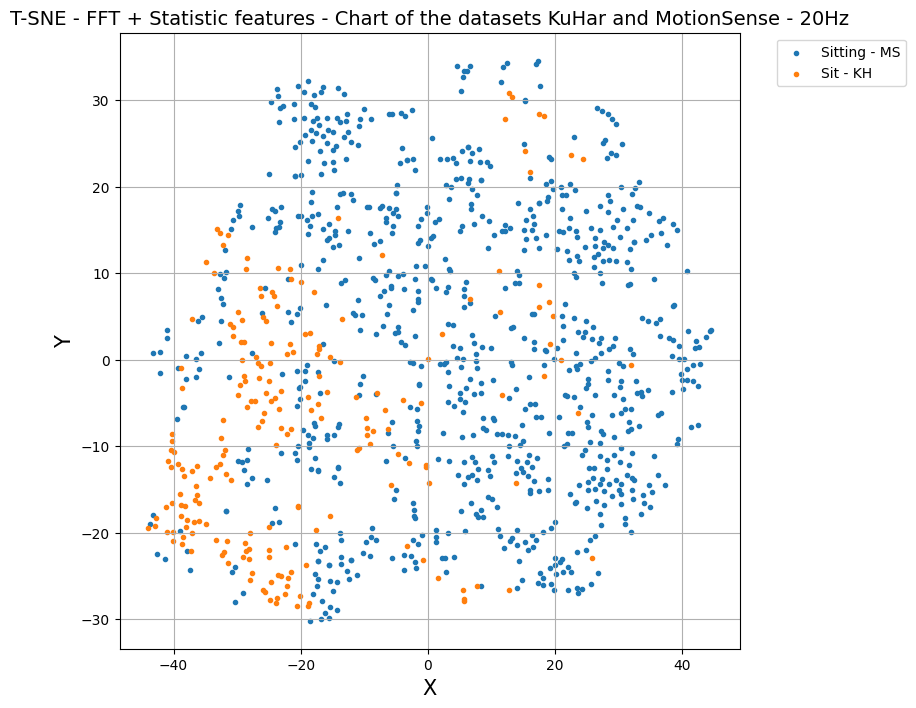

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


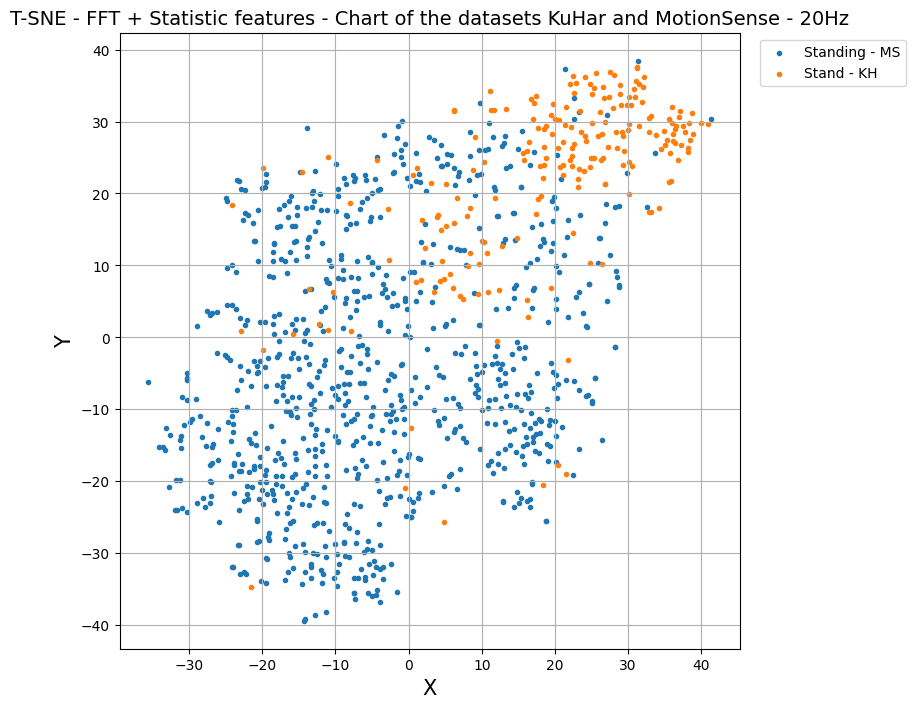

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


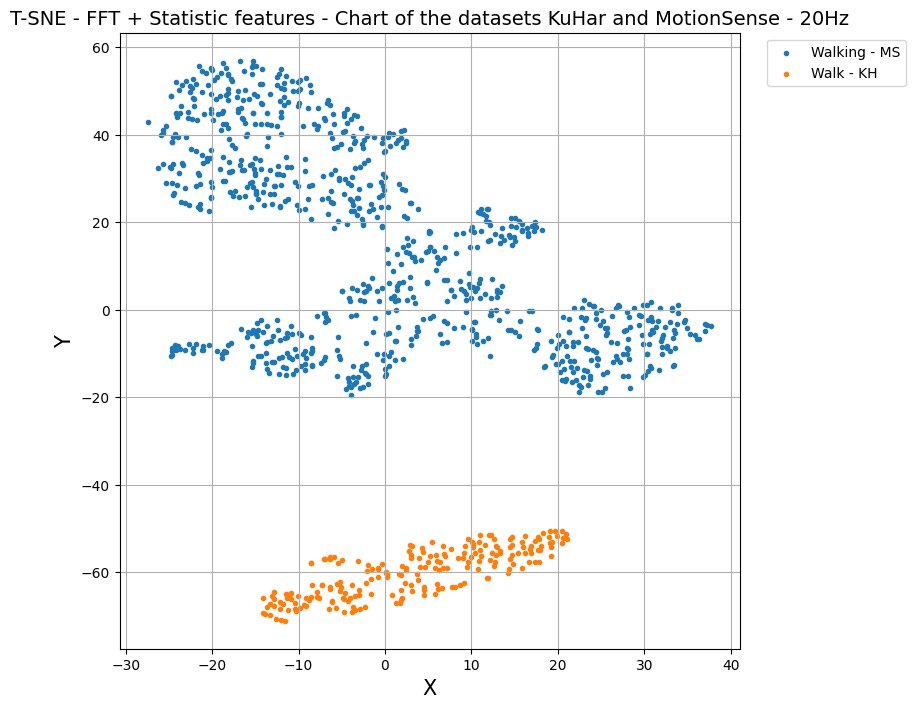

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


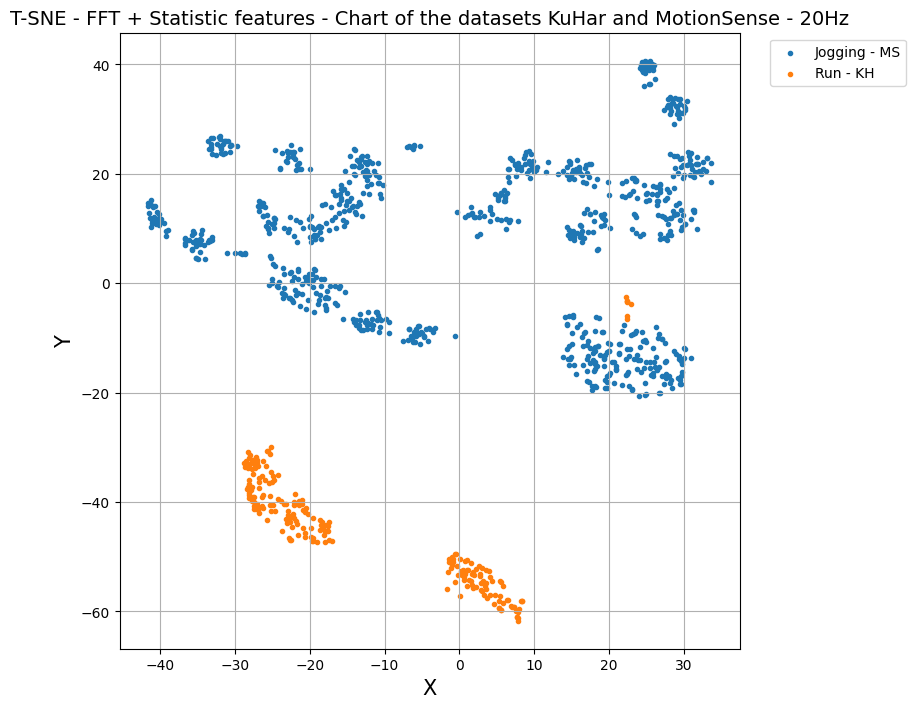

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


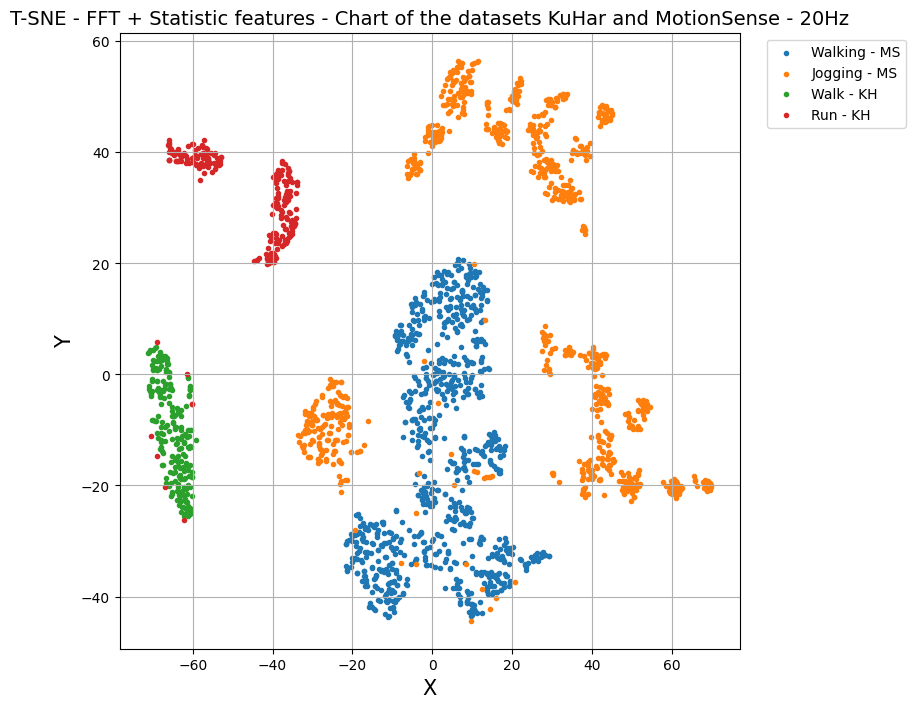

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


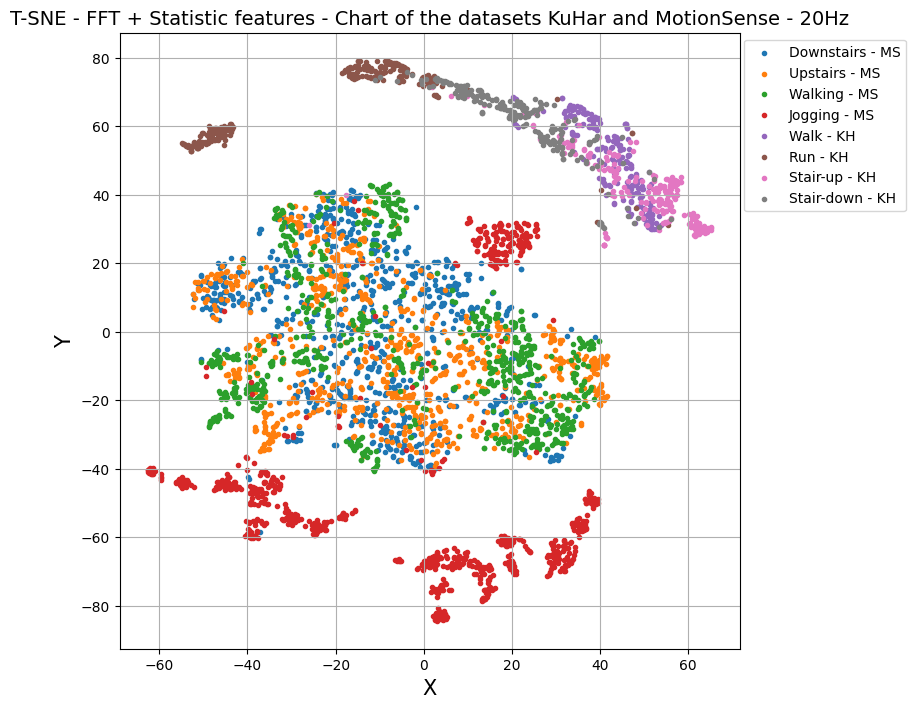

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


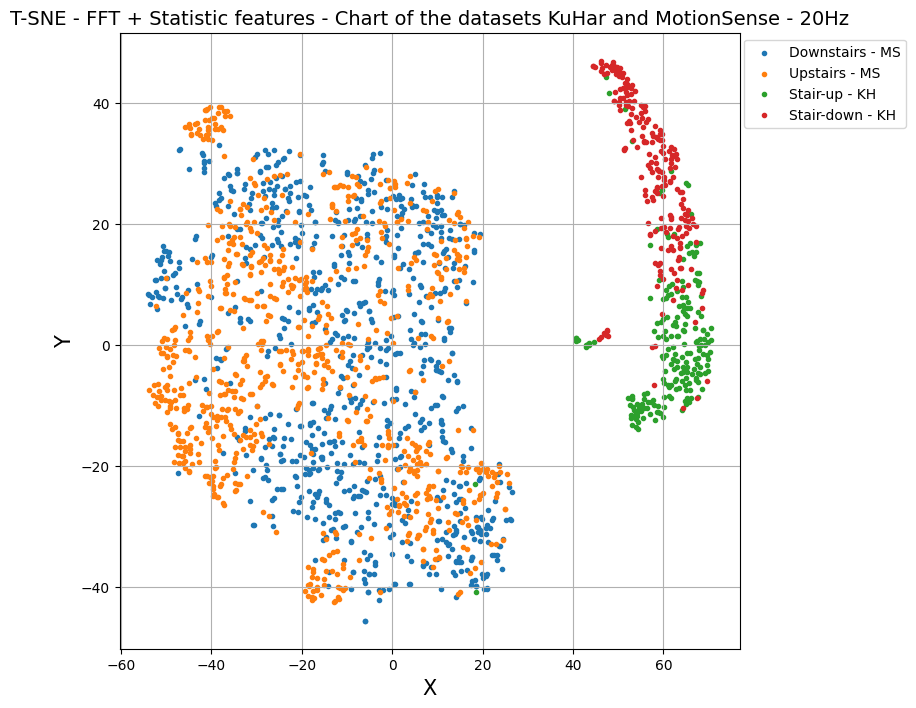

In [28]:
from librep.transforms.stats import StatsTransform

stats_transform = StatsTransform()
transforms = [fft_transform, stats_transform]
title = "T-SNE - FFT + Statistic features - Chart of the datasets KuHar and MotionSense - 20Hz"

for i in range(6):
    tsne(all_data, pares[i], classes, transforms, title)

tsne(all_data, [*pares[4], *pares[5]], classes, transforms, title)
tsne(all_data, [*pares[0], *pares[1], *pares[4], *pares[5]], classes, transforms, title)
tsne(all_data, [*pares[0], *pares[1]], classes, transforms, title)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


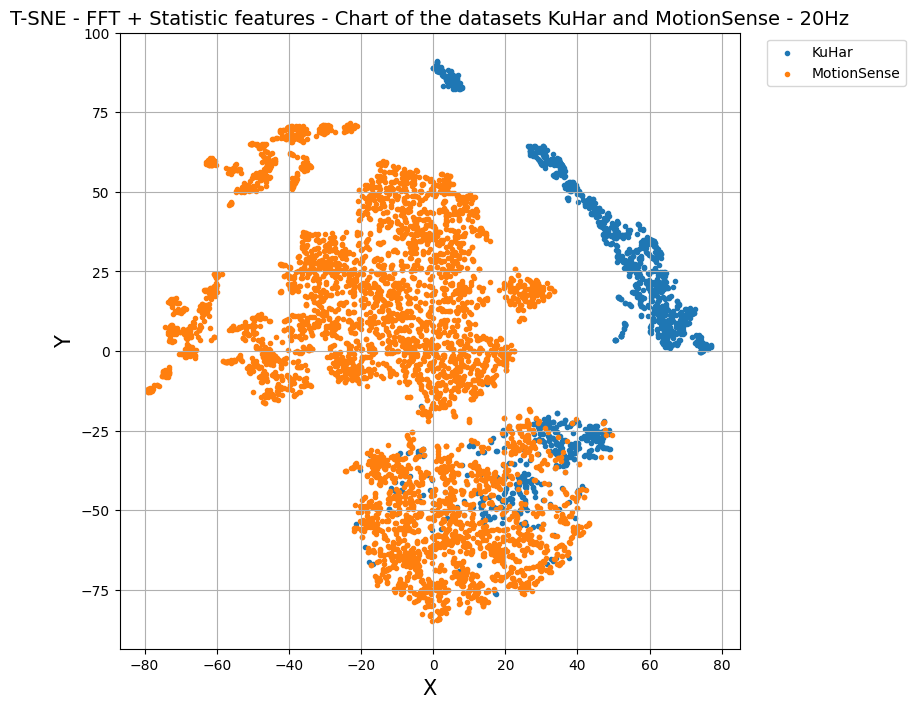

In [29]:
transformer = TransformMultiModalDataset(transforms=[fft_transform, stats_transform], 
                                         new_window_name_prefix="st.")
all_data_multimodal_fft_st = transformer(all_data_multimodal)

tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data_multimodal_fft_st.X)

tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = all_data_multimodal_fft_st.y

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title(title, fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('KuHar')
    else:
        labels.append('MotionSense')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
plt.show()